# **DAEGU APARTMENT PRICING PREDICTION**
****

#### **Content**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Feature Engineering
5. Modeling
6. Feature Importance
7. Conclusion
8. Recommendation

****

### **Business Problem**

**Background**

Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors. 

Individuals or companies usually make apartment (unit) offers. Bidders can sell units on a platform by determining their apartments’ prices. That way is quite difficult for apartment owners to adjust to market prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.

**Problem Statement**

This model seeks to conduct a predictive analysis in machine learning to aid developers (individuals or companies) in determining optimal apartment prices. Key factors, including apartment type, the number of nearby facilities, size, and price, will be considered in building a model that accurately predicts apartment prices.

**Urgency**

Rapid economic development in South Korea has elevated housing needs, making it a primary concern for people. Daegu, is no exception to the impact of South Korea's swift progress. Hence, addressing housing challenges in this context becomes imperative.

**Purpose**

Decide which price has the best profit and minimize loss

Analyse which features has the best correlation with the sales price and can best predict the average of apartment prices while maximizing sales and profit.

**Metric Evaluation**

The evaluation metrics to be used are **RMSE (Root Mean Square Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error)**. 

RMSE represents the square root of the average squared differences between predicted and actual values, MAE represents the average absolute differences, and MAPE represents the average percentage differences generated by the regression model. Smaller values of RMSE, MAE, and MAPE indicate higher accuracy in predicting rental prices based on the selected features.

****

#### **Data Understanding**

In [1]:
# Import library for exploratory data analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
# data check
df.info()

df.isna().sum()
display(df.isna().sum())

df.shape
display (df.shape)

df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

(4123, 11)

1422

In [4]:
# dataset descriptive statistics overview
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [5]:
#make new dataframe that only includes numeric values
df_numerik = df.select_dtypes(include= 'number')
df_numerik.head()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,1.0,5.0,1.0,0.0,1986,4,914,150442
2,1.0,7.0,3.0,56.0,1997,5,558,61946
3,5.0,5.0,4.0,798.0,2005,7,914,165486
4,0.0,1.0,2.0,536.0,2006,5,1743,311504


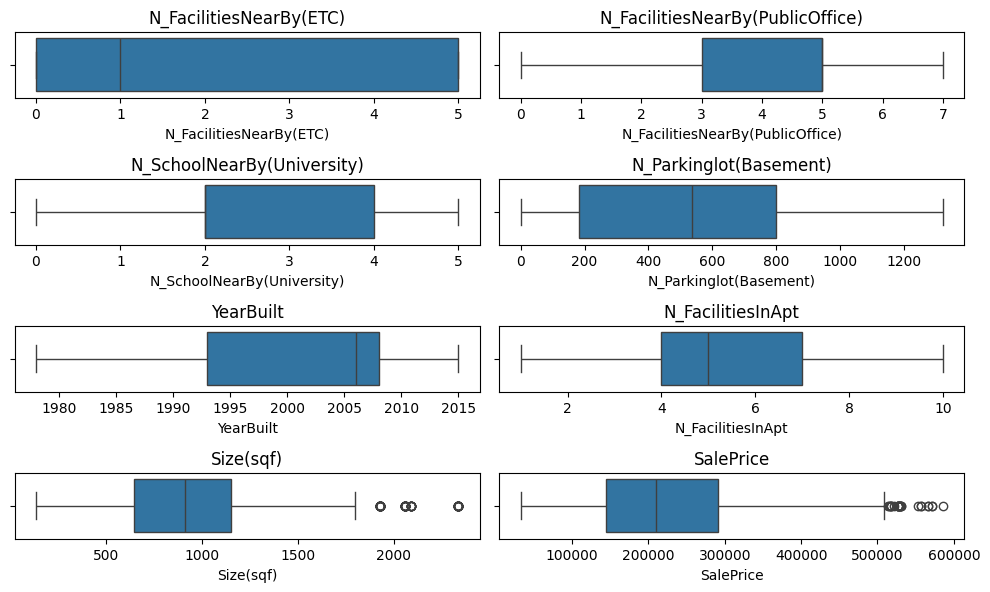

In [6]:
fig = plt.figure(figsize=(10,10)) 

count = 0
for y in df_numerik.columns:
    count += 1
    plt.subplot(7,2,count)
    sns.boxplot(df, x = y)
    fig.tight_layout() 
    plt.title(f'{y}')
plt.show()

In [7]:
# make new data frame to check how many unique values there are in a column
x = []

for col in df.columns : x.append( [col, df[col].nunique(), df[col].unique()])

unique_val = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=x)
unique_val.head()

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"


In [8]:
# categorical string data check
cat_data = ['HallwayType','TimeToSubway', 'SubwayStation']
for i in cat_data:
    print(i)
    print(df[i].value_counts())

HallwayType
HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64
TimeToSubway
TimeToSubway
0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: count, dtype: int64
SubwayStation
SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64


**Data Understanding Summary**

- Dataset consist of apartement units in Daegu with 11 columns and 4123 rows
- Every row represents one apartment unit
- Every column represents characteristics that will increase or decrease prices of the apartment units
- There are no missing data in this dataset
- There are 1422 duplicated data that will be treated later
- There are numeric (int64 & float64) and  categorical (object) data types from this dataset
- There are two columns with outliers which are:
    - Size (sqf) 
    - Saleprice 

- Data Dictionary

| Columns         | Description                                      |
|-------------------|------------------------------------------------|
| Hallway Type           | Apartment type             |
| TimeToSubway         | Time needed to the nearest subway station |
| SubwayStation       | The name of the nearest subway station |
| N_FacilitiesNearBy(ETC)       | The number of facilities nearby       |
| N_FacilitiesNearBy(PublicOffice)        | The number of public office facilities nearby |
| N_SchoolNearBy(University) | The number of universities nearby                     |
| N_Parkinglot(Basement)        | The number of the parking lot                               |
| YearBuilt      | The year the apartment was built         |
| N_FacilitiesInApt         | Number of facilities in the apartment |
| Size(sqft)        | The apartment size (in square feet)         |
| SalePrice    | The apartment price (Won)                  |

Categorical data types summary
- There are 3 Hallway Type column:
    - terraced (most apartment units 2528)
    - mixed 
    - corridor 
- There are 5 categories to divide Time To Subway column:
    - 0-5min (has the most apartment units 1953)
    - 5min~10min
    - 15min~20min
    - 10min~15min
    - no_bus_stop_nearby
- There are 8 categories to divide station in Subway Station column:
    - Kyungbuk_uni_hospital (has the most apartment units 1152)
    - Myung-duk
    - Banwoldang
    - Bangoge
    - Sin-nam
    - no_subway_nearby
    - Chil-sung-market
    - Daegu

****

#### **Data Preprocessing**

In this stage we will handle any anomalies from our dataset and see the correlation between features to determine what to use in our modeling

In [9]:
# normality test to determine the data distribution
# if normal use saphiro, if not use spearman

from scipy.stats import normaltest

for i in df_numerik.columns: #df numerik is a data frame consisting of just numeric data
    stats, p_val = normaltest(df[i])
    if p_val >= 0.05:
        print(f"{i} data terdistribusi normal")
    else:
        print(f"{i} data tidak terdistribusi normal")

N_FacilitiesNearBy(ETC) data tidak terdistribusi normal
N_FacilitiesNearBy(PublicOffice) data tidak terdistribusi normal
N_SchoolNearBy(University) data tidak terdistribusi normal
N_Parkinglot(Basement) data tidak terdistribusi normal
YearBuilt data tidak terdistribusi normal
N_FacilitiesInApt data tidak terdistribusi normal
Size(sqf) data tidak terdistribusi normal
SalePrice data tidak terdistribusi normal


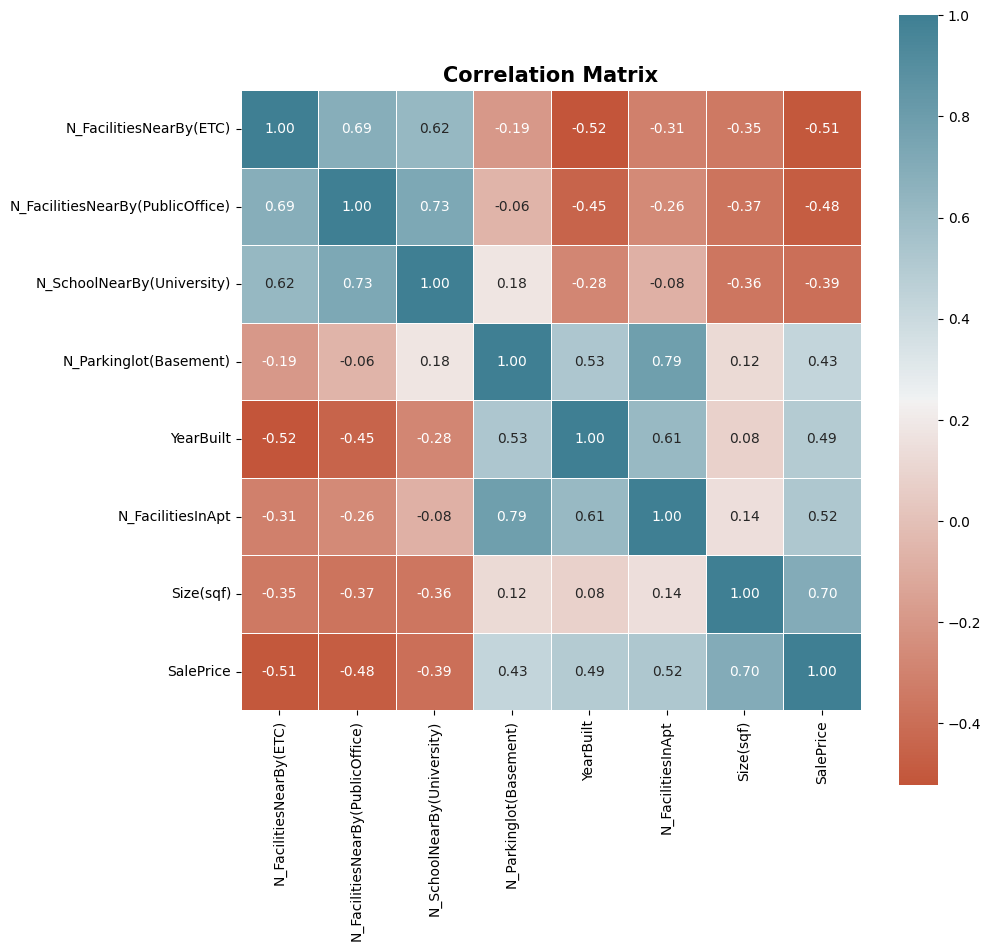

In [10]:
# Correlation matrix, karena data tidak berdistribusi normal maka pakai Spearman
plt.figure(figsize=(10, 10))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_numerik.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

From the correlation matrix above, we can infer that there are 4 features that correlate strongly with Sale Price which are:
- Size (sqf)
- N_FacilitiesInApt
- YearBuilt
- N_Parkinglot(Basement)

**Duplicated Data**

Duplicated data needs to be treated in Machine Learning because it can cause bias (reduce data diversity) and lead to overfitting. 

In [11]:
duplicates = df[df.duplicated()]
duplicates

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
# duplicated data check
df.duplicated().sum()

0

In [14]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


The total sum of our data after dropping the duplicated rows are 2701 rows

**Outliers Data**

- Outliers need to be treated in Machine Learning because outliers can lower the predictive modeling performance but there are some things to consider before dropping outliers, let us first see how many outliers there are in our dataset
- based on data understanding, we know that there are 2 columns with outliers which are:
    - size
    - sale price
- so we will focus on these two columns 

In [15]:
kolom_outlier = ['Size(sqf)', 'SalePrice']

for kolom in df_numerik.columns:
    if kolom in kolom_outlier:
        q1 = df[kolom].describe().loc['25%']
        q3 = df[kolom].describe().loc['75%']
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr 
        
        #print outliers sum
        jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
        total_data_points = df[kolom].shape[0]


        #outliers percentage
        percentage_outliers = (jumlah_outliers / total_data_points) * 100

        print(f"Data {kolom} has outliers: {jumlah_outliers} ({percentage_outliers:.2f}% of total data points)")

Data Size(sqf) has outliers: 84 (3.11% of total data points)
Data SalePrice has outliers: 17 (0.63% of total data points)


In [16]:
# Upper bound and Lower bound of Size (sqf) outliers

q1 = df['Size(sqf)'].describe().loc['25%']
q3 = df['Size(sqf)'].describe().loc['75%']

iqr = q3 - q1

lower_bound_size = q1 - 1.5 * iqr
upper_bound_size = q3 + 1.5 * iqr 

outliers_upper_size = df[df['Size(sqf)'] >= upper_bound_size]
outliers_lower_size = df[df['Size(sqf)'] <= lower_bound_size]

print('Lower bound Size (sqf):', lower_bound_size)
print('Upper bound Size (sqf):', upper_bound_size)

Lower bound Size (sqf): 107.0
Upper bound Size (sqf): 1803.0


In [17]:
# Upper bound and Lower bound of SalePrice outliers

q1 = df['SalePrice'].describe().loc['25%']
q3 = df['SalePrice'].describe().loc['75%']

iqr = q3 - q1

lower_bound_sale = q1 - 1.5 * iqr
upper_bound_sale = q3 + 1.5 * iqr 

outliers_upper_sale = df[df['SalePrice'] >= upper_bound_sale]
outliers_lower_sale = df[df['SalePrice'] <= lower_bound_sale]

print('Lower bound SalePrice:', lower_bound_sale)
print('Upper bound SalePrice:', upper_bound_sale)

Lower bound SalePrice: -67478.5
Upper bound SalePrice: 521901.5


In [18]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


In the event that outliers originate from inaccuracies in data or exceptionally extreme measurements, it is advisable to remove them. Nevertheless, upon examination of the provided descriptive statistics, it becomes apparent that the Size (sqf) and Saleprice data are real. This affirmation is further underpinned by domain knowledge, attesting to the existence of big/generously sized apartments and high-value units in the real world.

Consequently, following the evaluation of duplicates and outlier analysis, it has been decided that the removal of outliers is unnecessary. Therefore, in alignment with domain expertise, **the dataset is deemed to be clean.**

****

#### **Feature Engineering**

Feature engineering involves the creation, transformation, or selection of features from raw data to enhance the performance of machine learning models. It will ensure that the selected features are relevant to the problem at hand, improving the model's capacity to capture important patterns and relationships in the data.

In [19]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


In [20]:
df_numerik.drop('SalePrice', axis=1).columns

Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')

**Scaling**

Scaling is the process of transforming numerical data within a dataset to a specific range with the aim of improving consistency between variables that have different units or ranges. The goal is to make variables comparable fairly. In the context of machine learning, scaling is often used for algorithms that are sensitive to differences in data scale, such as regression algorithms. Scaling can also help optimize algorithm performance, reduce computation time, and enhance model interpretability.

In the dataset, there are features with significantly different ranges, namely the 'N_Parkinglot(Basement)' and 'Size(sqf)' features. Therefore, we will apply Robust Scaler to the 'N_Parkinglot(Basement)' and 'Size(sqf)' features. This method can improve the consistency of data with outlier values and skewed data distributions, thereby reducing the influence of extreme values on the analysis results.

**Encoding**

Encoding is the process of converting data from one format to another, typically done on categorical data to transform it into numerical data before it can be used to train a model.

In the dataset, several features are categorical, so we need to perform encoding on these categorical data. The encoding methods to be applied are as follows:

- One-Hot Encoding: HallwayType, because the feature is a nominal variable with 3 categories (One-Hot Encoding is chosen over Binary Encoding because the number of categories is below 5)
- Binary Encoding: SubwayStation, because the feature is a nominal variable with 8 categories (Binary Encoding is chosen over One-Hot Encoding because the number of categories is over 5, and we want to create fewer dummy variables to reduce overfitting that may occur with an increasing number of variables used in building the model)
- Ordinal Encoding: TimeToSubway, because the feature is an ordinal variable, and the categories in the feature have a specific order based on the time required to reach the nearest station

In [21]:
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.preprocessing import RobustScaler, OneHotEncoder

ordinal_mapping = [{'col':'TimeToSubway', 'mapping':{'no_bus_stop_nearby':0, '0min-5min':1, '5min-10min':2, '10min-15min':3, '15-20min':4}}]

ordinal_encoder = OrdinalEncoder(['TimeToSubway'], mapping=ordinal_mapping)

transform = ColumnTransformer([
    ('scaling', RobustScaler(), df_numerik.drop('SalePrice', axis=1).columns),
    ('OneHotEncoding', OneHotEncoder(drop='first'), ['HallwayType']),
    ('BinaryEncoding', BinaryEncoder(), ['SubwayStation']),
    ('OrdinalEncoding', OrdinalEncoder(), ['TimeToSubway'])
])

transform

ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                 Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')),
                                ('OneHotEncoding', OneHotEncoder(drop='first'),
                                 ['HallwayType']),
                                ('BinaryEncoding', BinaryEncoder(),
                                 ['SubwayStation']),
                                ('OrdinalEncoding', OrdinalEncoder(),
                                 ['TimeToSubway'])])

**Splitting Data**

Next, we will define variables X and Y. In regression modeling, X represents the independent variable used to predict the value of Y or the dependent variable. Meanwhile, Y is the dependent variable or the variable to be predicted.

X = 
- HallwayType
- TimeToSubway
- SubwayStation
- N_FacilitiesNearBy(ETC)
- N_FacilitiesNearBy(PublicOffice)
- N_SchoolNearBy(University)
- N_Parkinglot(Basement)
- YearBuilt
- N_FacilitiesInApt, Size(sqf)

Y = 
- SalePrice

The data is split into two parts: 80% for training data and 20% for testing data. Training data is used to train the machine learning model, while testing data is used to evaluate the performance of the trained model

In [22]:
# Split Data

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=2024,
    test_size=0.2)
x_train.shape, x_test.shape

((2160, 10), (541, 10))

#### **Benchmark Model**

After the dataset has been split into data train and data test, we will now select a benchmark model to determine a reference model that will serve as the basis for comparing the performance of newly developed models.

Several regression models considered for benchmarking are as follows:

1. Linear Regression: A model used to model the linear relationship between one or more input variables and the target variable.

2. Random Forest: A regression model that builds multiple decision trees randomly, using different training data subsets and random feature subsets from the available dataset. Each decision tree is generated using bootstrap sampling and feature bagging techniques.

3. Decision Tree: A regression model in the form of a decision tree structure consisting of a series of nodes and edges.

4. Support Vector Regression (SVR): A regression model used to predict the target value based on given independent features or variables, similar to Support Vector Machine (SVM) but with the goal of finding the best hyperplane (line or plane) that can separate data in feature space.

5. Ridge Regression:  linear regression model that reduces overfitting by adding the square sum of coefficients as regularization to the linear regression equation.

6. Lasso Regression: A linear regression model that reduces overfitting by adding the absolute sum of coefficients as regularization to the linear regression equation, setting some coefficients to zero, prioritizing essential features.

7. KNN Regression: A regression model based on the K-Nearest Neighbors (KNN) algorithm, finding the K nearest neighbors from the input data to be predicted and then predicting the numerical target variable.

8. Ada Boost Regressor: A regression model used to predict the target value based on given independent features or variables, similar to Support Vector Machine (SVM) but with the goal of finding the best hyperplane (line or plane) that can separate data in feature space.

Cross-validation is also employed as the method for evaluating model performance. This involves dividing the dataset into 5 equally sized partitions, training the model on 4 partitions, and testing it on the remaining partition. This procedure is repeated 5 times, with different partitions as validation and training data. The model's performance is then calculated based on the average performance. This method helps avoid overfitting or underfitting and aims to achieve better model generalization.

In [23]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#define model
linreg = LinearRegression ()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor ()
svr = SVR ()
ridge = Ridge ()
lasso = Lasso ()
knn = KNeighborsRegressor ()
ab = AdaBoostRegressor ()

#### **Performance Metrics**

Performance metrics is used to evaluate and quantify the effectiveness of a model in making predictions. In this case we will use three metrics which are MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), and MAPE (Mean Absolute Percentage Error).

In [24]:
# MAE
models = [linreg, rf, dt, svr, ridge, lasso, knn, ab]
scores_mae = []
mean_scores_mae = []
std_scores_mae = []

for model in models:
    papi = Pipeline([
        ('preprocess', transform),
        ('model', model)
    ])

    # Perform cross-validation with multiple scoring metrics
    cv = cross_val_score(papi, x_train, y_train, cv=5, scoring= 'neg_mean_absolute_error')
    
    scores_mae.append(cv)
    mean_scores_mae.append(cv.mean())
    std_scores_mae.append(cv.std())

In [25]:
# RMSE
models = [linreg, rf, dt, svr, ridge, lasso, knn, ab]
scores_rmse = []
mean_scores_rmse = []
std_scores_rmse = []

for model in models:
    papi = Pipeline([
        ('preprocess', transform),
        ('model', model)
    ])

    # Perform cross-validation with multiple scoring metrics
    cv = cross_val_score(papi, x_train, y_train, cv=5, scoring= 'neg_root_mean_squared_error')
    
    scores_rmse.append(cv)
    mean_scores_rmse.append(cv.mean())
    std_scores_rmse.append(cv.std())

In [26]:
# MAPE
models = [linreg, rf, dt, svr, ridge, lasso, knn, ab]
scores_mape = []
mean_scores_mape = []
std_scores_mape = []

for model in models:
    papi = Pipeline([
        ('preprocess', transform),
        ('model', model)
    ])

    # Perform cross-validation with multiple scoring metrics
    cv = cross_val_score(papi, x_train, y_train, cv=5, scoring= 'neg_mean_absolute_percentage_error')
    
    scores_mape.append(cv)
    mean_scores_mape.append(cv.mean())
    std_scores_mape.append(cv.std())


In [27]:
list = pd.DataFrame({
    'Model' : ['Linear Regression', 'Random Forest','Decision Tree','SVR','Ridge','Lasso','KNN', 'AdaBoost'],
    'MAPE Mean' : mean_scores_mape,
    'MAPE Std' : std_scores_mape,
    'RMSE Mean' : mean_scores_rmse,
    'RMSE Std' : std_scores_rmse,
    'MAE Mean' : mean_scores_mae,
    'MAE Std' : std_scores_mae
})

list.sort_values('MAPE Mean',ascending=False)

,Model,MAPE Mean,MAPE Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std
2,Decision Tree,-0.190261,0.005464,-46575.728523,1678.647784,-37490.101623,1234.371188
1,Random Forest,-0.190813,0.005187,-46551.702463,1487.583830,-37508.080076,1115.530366
6,KNN,-0.204729,0.008037,-49793.189177,1136.260918,-39105.813056,682.931251
0,Linear Regression,-0.220152,0.004949,-52184.064592,1605.797540,-42396.027592,1351.607502
5,Lasso,-0.220154,0.004946,-52183.861706,1605.862750,-42396.412490,1351.701007
4,Ridge,-0.220219,0.004915,-52180.487551,1606.332749,-42404.137322,1354.732890
7,AdaBoost,-0.239645,0.008393,-50812.169264,1119.823750,-42297.028508,1028.297907
3,SVR,-0.548379,0.028752,-104244.029199,2214.159419,-84196.405513,2012.992421


#### **Hyperparameter Tuning**

Next, we're going to tune our two best models based on benchmark we've already done. This is to optimize the performance of a model by systematically searching for the best combination of hyperparameter values. Onward, we're going to use just one performance metrics which is MAPE because based on the performance metrics done, the results are directly proportional to each other. 

In [28]:
# Tuning Model Decission Tree & Random Forest

# check the regressor parameter
?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minim

**Best Model 1: Decision Tree**

In [29]:
max_depth = np.arange(1, 6)

criterion = ["squared_error", "friedman_mse", "absolute_error","poisson"]


splitter= ["best", "random"]

min_samples_split= np.arange(1, 6)
min_samples_leaf= np.arange(1, 6)


# Hyperparam Decision Tree
hyperparam_decision_tree = {
    'model__max_depth': max_depth,
    'model__criterion' : criterion,
    'model__splitter' : splitter,
    'model__min_samples_split' : min_samples_split,
    'model__min_samples_leaf' : min_samples_leaf
}

In [30]:
# pipeline Decision Tree

papi = Pipeline([
    ('preprocess', transform),
    ('model', dt)
    ])

# Hyperparameter tuning
grid_search_dt = GridSearchCV(
    papi, 
    param_grid= hyperparam_decision_tree,
    cv = 5, 
    scoring = 'neg_mean_absolute_percentage_error'
)

In [31]:
# Fitting data training untuk mencari parameter terbaik
grid_search_dt.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         RobustScaler(),
                                                                         Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')),
                                                                        ('OneHotEncoding',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Ha...
                                                                         ['TimeToSubway'])])),
                                       ('model', DecisionTreeRegressor())]),
             param_grid={'model__criterion': ['squared_error', 'friedman_mse',
                                              'absolute_error', 'poisson'],
                         'model__max_depth': array([1, 2, 3, 4, 5]),
                         'model__min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'model__min_samples_split': array([1, 2, 3, 4, 5]),
                         'model__splitter': ['best', 'random']},
             scoring='neg_mean_absolute_percentage_error')

In [32]:
pd.DataFrame(grid_search_dt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_model__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007160,0.000571,0.000000,0.000000,squared_error,1,1,1,best,"{'model__criterion': 'squared_error', 'model__...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,801
1,0.006776,0.000168,0.000000,0.000000,squared_error,1,1,1,random,"{'model__criterion': 'squared_error', 'model__...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,801
2,0.006969,0.000493,0.002188,0.000156,squared_error,1,1,2,best,"{'model__criterion': 'squared_error', 'model__...",-0.369279,-0.351194,-0.385138,-0.363629,-0.396598,-0.373168,0.016008,681
3,0.006360,0.000082,0.002025,0.000087,squared_error,1,1,2,random,"{'model__criterion': 'squared_error', 'model__...",-0.369279,-0.351194,-0.385138,-0.363629,-0.396598,-0.373168,0.016008,681
4,0.006351,0.000035,0.001959,0.000008,squared_error,1,1,3,best,"{'model__criterion': 'squared_error', 'model__...",-0.369279,-0.351194,-0.385138,-0.363629,-0.396598,-0.373168,0.016008,681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.007399,0.000076,0.001972,0.000017,poisson,5,5,3,random,"{'model__criterion': 'poisson', 'model__max_de...",-0.222740,-0.208527,-0.226771,-0.220947,-0.240361,-0.223869,0.010253,191
996,0.007633,0.000019,0.001979,0.000013,poisson,5,5,4,best,"{'model__criterion': 'poisson', 'model__max_de...",-0.205829,-0.205668,-0.196554,-0.218344,-0.209114,-0.207102,0.007006,45
997,0.007373,0.000063,0.001982,0.000022,poisson,5,5,4,random,"{'model__criterion': 'poisson', 'model__max_de...",-0.216302,-0.212235,-0.222444,-0.226740,-0.235240,-0.222592,0.008050,151
998,0.007614,0.000058,0.001971,0.000007,poisson,5,5,5,best,"{'model__criterion': 'poisson', 'model__max_de...",-0.205829,-0.205668,-0.196554,-0.218344,-0.209114,-0.207102,0.007006,45


In [33]:
# Cek skor dan params terbaik
print('Decision Tree')
print('Best_score:', grid_search_dt.best_score_)
print('Best_params:', grid_search_dt.best_params_)

Decision Tree
Best_score: -0.198905978121009
Best_params: {'model__criterion': 'absolute_error', 'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__splitter': 'best'}


In [34]:
dt_best = DecisionTreeRegressor(criterion='absolute_error', max_depth= 5, min_samples_split= 2, splitter='best')

papi_dt = Pipeline([
    ('preprocess', transform),
    ('model', dt_best)
    ])

**Best Model 2: Random Forest**

In [35]:
# check the regressor parameters
?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is use

In [36]:
n_estimators= [100, 200, 300]

criterion = ["squared_error"]

max_depth = np.arange(1, 6)

min_samples_split= np.arange(1, 6)

min_samples_leaf= np.arange(1, 6)

# Hyperparam Random Forest
hyperparam_random_forest = {
    'model__n_estimators': n_estimators,
    'model__criterion' : criterion,
    'model__max_depth' : max_depth,
    'model__min_samples_split' : min_samples_split,
    'model__min_samples_leaf' : min_samples_leaf
}

In [37]:
# pipeline Random Forest

papi = Pipeline([
    ('preprocess', transform),
    ('model', rf)
    ])

# Hyperparameter tuning
grid_search_rf = GridSearchCV(
    papi, 
    param_grid= hyperparam_random_forest,
    cv = 5, 
    scoring = 'neg_mean_absolute_percentage_error'
)

In [38]:
# Fitting data training untuk mencari parameter terbaik
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         RobustScaler(),
                                                                         Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')),
                                                                        ('OneHotEncoding',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Ha...
                                                                        ('OrdinalEncoding',
                                                                         OrdinalEncoder(),
                                                                         ['TimeToSubway'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__criterion': ['squared_error'],
                         'model__max_depth': array([1, 2, 3, 4, 5]),
                         'model__min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'model__min_samples_split': array([1, 2, 3, 4, 5]),
                         'model__n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_percentage_error')

In [39]:
pd.DataFrame(grid_search_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007047,0.000327,0.000000,0.000000,squared_error,1,1,1,100,"{'model__criterion': 'squared_error', 'model__...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
1,0.006748,0.000063,0.000000,0.000000,squared_error,1,1,1,200,"{'model__criterion': 'squared_error', 'model__...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
2,0.006853,0.000184,0.000000,0.000000,squared_error,1,1,1,300,"{'model__criterion': 'squared_error', 'model__...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
3,0.053979,0.002372,0.003663,0.000227,squared_error,1,1,2,100,"{'model__criterion': 'squared_error', 'model__...",-0.369279,-0.351049,-0.385986,-0.363835,-0.395797,-0.373189,0.015924,277
4,0.098008,0.000357,0.004580,0.000043,squared_error,1,1,2,200,"{'model__criterion': 'squared_error', 'model__...",-0.369227,-0.351391,-0.384451,-0.363202,-0.396697,-0.372994,0.015936,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0.161024,0.000255,0.006431,0.000055,squared_error,5,5,4,200,"{'model__criterion': 'squared_error', 'model__...",-0.204601,-0.195265,-0.192731,-0.204003,-0.208150,-0.200950,0.005905,39
371,0.238754,0.000821,0.008622,0.000100,squared_error,5,5,4,300,"{'model__criterion': 'squared_error', 'model__...",-0.204596,-0.195539,-0.192981,-0.203759,-0.208437,-0.201062,0.005830,50
372,0.083566,0.000272,0.004417,0.000088,squared_error,5,5,5,100,"{'model__criterion': 'squared_error', 'model__...",-0.204521,-0.195897,-0.193023,-0.203450,-0.209093,-0.201197,0.005889,55
373,0.166226,0.001158,0.007065,0.000042,squared_error,5,5,5,200,"{'model__criterion': 'squared_error', 'model__...",-0.204497,-0.194408,-0.192750,-0.204034,-0.208484,-0.200834,0.006145,34


In [40]:
# Cek skor dan params terbaik
print('Random Forest')
print('Best_score:', grid_search_rf.best_score_)
print('Best_params:', grid_search_rf.best_params_)

Random Forest
Best_score: -0.1992395462396069
Best_params: {'model__criterion': 'squared_error', 'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 200}


In [41]:
rf_best = RandomForestRegressor(criterion='squared_error', max_depth= 5, min_samples_leaf= 1, min_samples_split =4, n_estimators = 100)

papi_rf = Pipeline([
    ('preprocess', transform),
    ('model', rf_best)
    ])

**Performance Comparison**

Comparison of the best two models which are the Decision Tree model and Random Forest model before and after hyperparameter tuning

In [42]:
# Decision Tree

# Before tuning
print('Decision Tree Score Before Tuning:', list.loc[list['Model'] == 'Decision Tree', 'MAPE Mean'].values[0])

# After tuning
print ('Decision Tree Score After Tuning:' ,grid_search_dt.best_score_)

Decision Tree Score Before Tuning: -0.19026097438204828
Decision Tree Score After Tuning: -0.198905978121009


In [43]:
# Random Forest

# Before tuning
print('Random Forest Score Before Tuning:', list.loc[list['Model'] == 'Random Forest', 'MAPE Mean'].values[0])

# After tuning
print ('Random Forest Score After Tuning:' ,grid_search_rf.best_score_)

Random Forest Score Before Tuning: -0.19081334316437068
Random Forest Score After Tuning: -0.1992395462396069


The results indicate that the Random Forest model performed the best among the benchmark models (Decision Tree and Random Forest)

Random Forest Score Before Tuning: -0.19081334316437068

Random Forest Score After Tuning: -0.1992395462396069

After hyperparameter tuning, its performance further improved, with the score increasing from -0.1908 before tuning to -0.1992 after tuning. This suggests that the Random Forest model exhibits enhanced predictive capabilities following parameter adjustments.

**Evaluate Model to Data Test with the Tuned Model**

From the best two models Decision Tree and Random Forest, Random Forest is the best model from those two. So we will evaluate our data test to the Random Forest model.

In [44]:
# Fit Model To Test
papi_rf.fit(x_train,y_train)

# Make predictions on test data
y_pred = papi_rf.predict(x_test)

# Evaluate performance on test data
mape_test = mean_absolute_percentage_error(y_test, y_pred)

# Print or log the results
print(f'MAPE on Test Data: {mape_test}')

MAPE on Test Data: 0.2041327184506061


Based on the best model (Random Forest), 

a MAPE of 0.2041 means that, on average, the model's predictions have an error of around 20.41% when compared to the actual values on the test data. 

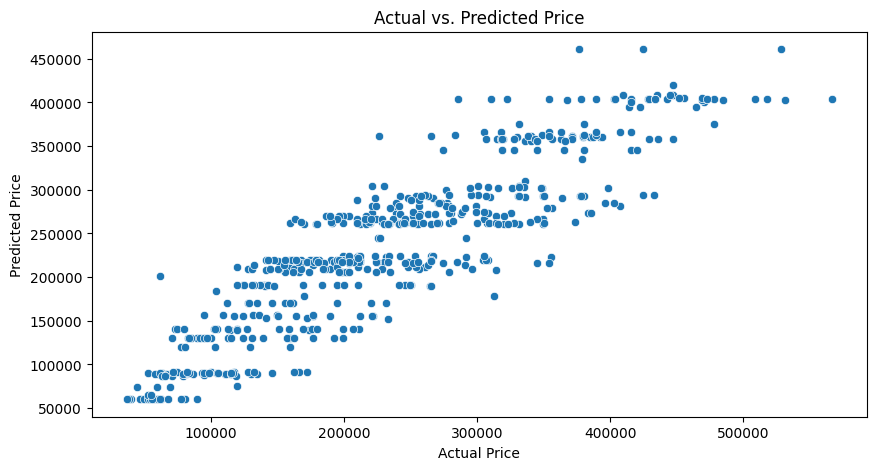

In [45]:
plt.figure(figsize=(10, 5))
plot = sns.scatterplot(x=y_test, y=y_pred).set(title='Actual vs. Predicted Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Based on the examination of the actual vs predicted price using the Random Forest model above, it can be inferred that the graph tends to spread more as the prices increase. It can be concluded that the higher the price, the lower the accuracy of the predictions.

#### **Feature Importance**

To find out which features significantly influence the target (SalePrice), we will check it through the feature_importances_ function

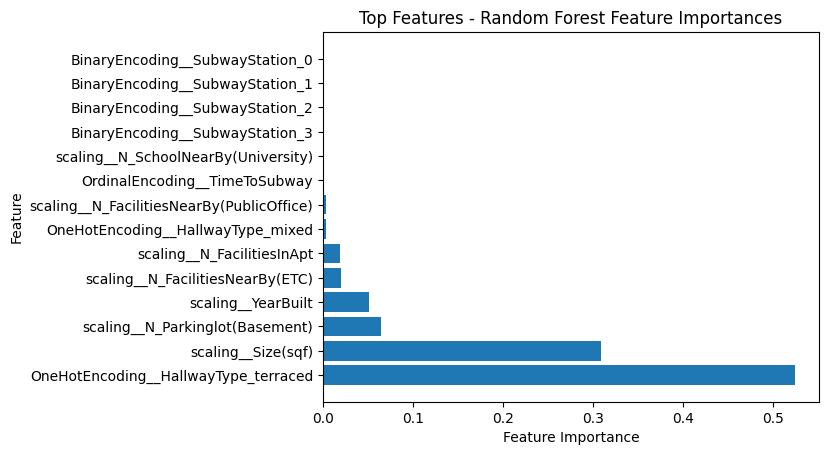

In [46]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Get feature importance and names
feature_importances = papi_rf.named_steps['model'].feature_importances_
feature_names = papi_rf.named_steps['preprocess'].get_feature_names_out()

# Create a DataFrame for easier manipulation
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Features - Random Forest Feature Importances')
plt.show()

****

#### **Conclusion**

After modeling and testing using various regression models, the evaluation results based on the metrics used are obtained. The models tested include:
- Random Forest Regressor
- Decision Tree Regressor
- AdaBoost Regressor
- KNN Regressor
- Lasso Regression
- Ridge Regression
- SVR
- Linear Regression

Here are the evaluation metric test results for the best two models:

- Decision Tree Model: Before Tuning: -0.19026097438204828, After Tuning: -0.19081334316437068

- Random Forest Model: Before Tuning: -0.19086167567461446, After Tuning: -0.1992395462396069

After tuning, both the Decision Tree and Random Forest regression models showed improvements in predicting apartment prices in Daegu, with more negative mean absolute percentage error (MAPE) scores. 

The Random Forest model, however, achieved a slightly better MAPE (-0.1992) compared to the Decision Tree model (-0.1989). It was tested using these Random Forest parameters:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf

Therefore, the Random Forest model is preferred for its marginally better predictive performance based on the provided metric.

From these results, the best-performing model used to predict apartment prices in Daegu, South Korea, is the tuned Random Forest Regressor, with a MAPE value of 20.41%.

![Screenshot 2024-03-05 at 16.02.50.png](<attachment:Screenshot 2024-03-05 at 16.02.50.png>)

According to Lewis (1982), a model with a MAPE value between 10% and 20% can be interpreted as having good forecasting capabilities. Therefore, the tuned Random Forest Regressor model can be considered good at predicting apartment prices in Daegu

However, it should be noted that predictions of apartment prices may deviate from the actual prices. This is due to the limitations of the features used in modeling. Therefore, this model needs further improvement by adding more features or by adjusting model parameters

Based on the tuned Random Forest Regressor model, the most influential features on apartment prices are:
- the terraced apartment type
- apartment size (Size)
- the number of basement parking spaces

With this regression model, developer or real estate agents can determine the right selling price for apartments in Daegu, thereby increasing the success rate in marketing and selling these apartment units. Additionally, this regression model can help real estate agents understand how the characteristics of apartments and apartment prices are interrelated. Therefore, this model is highly beneficial compared to the absence of a regression model.
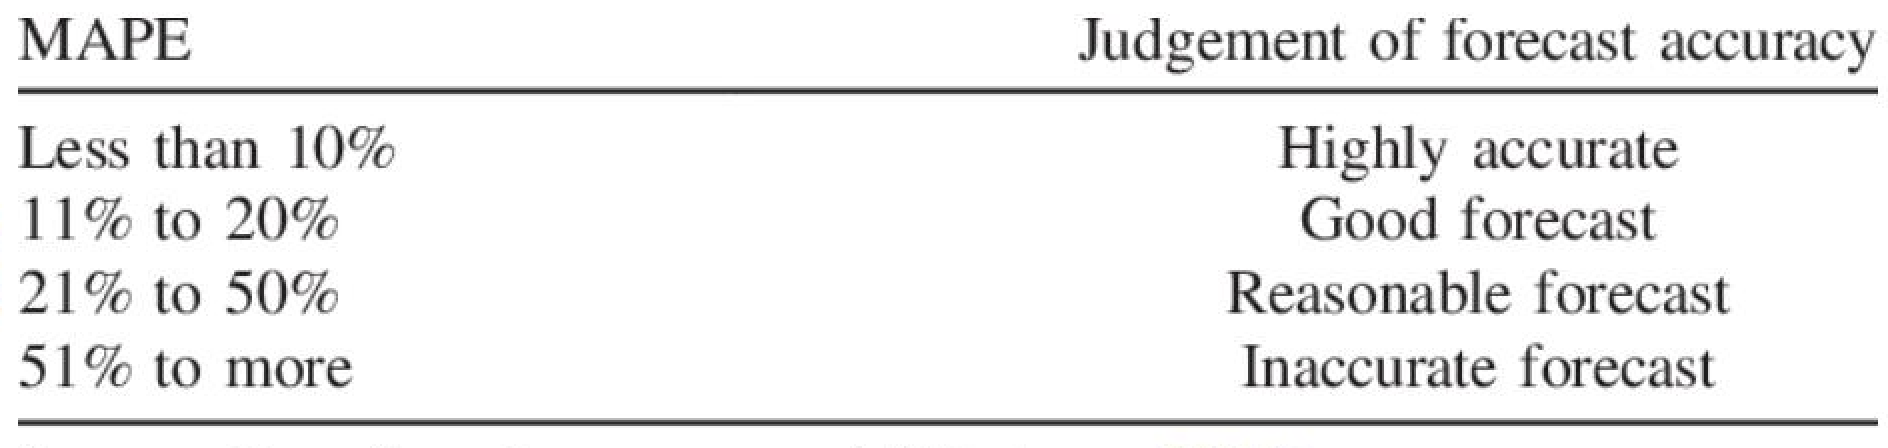

#### **Recommendation**

1. Model Optimalization: While the Random Forest model shows the best performance among other models, there is still room for improvement. Therefore, it is recommended to conduct further research by considering other features that may influence apartment prices in Daegu.

2. Tuning Parameter: As a next step, it is advisable to perform tuning on the model parameters. There might be opportunities to enhance model accuracy by adjusting these parameters.

3. Model Implementation: Utilize this model as a supportive tool in determining apartment selling prices. This will assist real estate agents in maximizing profits and improving the success rate in sales.

4. Developer (Agent) Training: Agents or the people involved should be trained and understand this model and how it operates. They should be able to apply this knowledge in their sales processes.

5. Next Predictive Model Development: Use the knowledge gained from this model to develop predictive models for apartments in other locations.

In [47]:
# Save Model

# Import library
import pickle as pickle
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [48]:
# Save Machine Learning

pipe_model=Pipeline([('preprocessing',transform),('model',RandomForestRegressor())])
pipe_model.fit(x_train,y_train)

pickle.dump(pipe_model,open('data_daegu_apartment.sav','wb'))

# Load Machine Learning

file_name='data_daegu_apartment.sav'

loaded_model=pickle.load(open(file_name,'rb'))

In [49]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mean_absolute_percentage_error(y_test,loaded_model.predict(x_test))

19.430920077393946